<a href="https://colab.research.google.com/github/hafilmr/LearningCodeTrainee/blob/main/Deep%20Learning%20ANN/Human_Activity_Recognition_ANN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Import Library**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import tensorflow as tf
# concatenate layer since that is needed to join multiple features together
from tensorflow.keras.layers import Dense, Input, Concatenate
from tensorflow.keras.models import Model
# multiclass classification
from tensorflow.keras.losses import SparseCategoricalCrossentropy
# save the best model we encountered during training.
from tensorflow.keras.callbacks import ModelCheckpoint

from sklearn.metrics import r2_score
from sklearn.preprocessing import StandardScaler

np.random.seed(123)
tf.random.set_seed(123)

# **Import Data**

## Data Exploration

In [ ]:
!wget -nc https://lazyprogrammer.me/course_files/timeseries/UCI-HAR.zip

--2022-02-08 07:38:37--  https://lazyprogrammer.me/course_files/timeseries/UCI-HAR.zip
Resolving lazyprogrammer.me (lazyprogrammer.me)... 172.67.213.166, 104.21.23.210, 2606:4700:3030::ac43:d5a6, ...
Connecting to lazyprogrammer.me (lazyprogrammer.me)|172.67.213.166|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 60999314 (58M) [application/zip]
Saving to: ‘UCI-HAR.zip’

UCI-HAR.zip         100%[===================>]  58.17M  24.3MB/s    in 2.4s    

2022-02-08 07:38:39 (24.3 MB/s) - ‘UCI-HAR.zip’ saved [60999314/60999314]



In [ ]:
# Unzip file with python
!unzip -nq UCI-HAR.zip

In [ ]:
# !ls for list -> find out the contents of all files in the folder
!ls

 __MACOSX   sample_data  'UCI HAR Dataset'   UCI-HAR.zip


In [ ]:
!ls 'UCI HAR Dataset'

activity_labels.txt  features_info.txt	features.txt  README.txt  test	train


We have three files along with one folder, so the `subject's` file is not too important unless you want to be able to identify which subject corresponds to which sample.
Since we don't really care about that for this task, it's not really important for us. As an exercise you might want to check whether or not the same subjects appear in both the train and test set.
That would indicate how much we can trust our model to generalize to new subjects.

The next file to look at is `x_train.txt`. although the data is a time series, the researchers also created features from each time series.
`x_train.txt` where those features are stored. As usual, it's formatted with each row being one sample and each column being one feature.

Next step is to look at `y_train.txt`. This is where the labels are stored.

And lastly, we have the `inertial signals` folder.

So this is where the time series are stored.
Will look inside this folder in a moment.


In [ ]:
!ls 'UCI HAR Dataset/train'

'Inertial Signals'   subject_train.txt	 X_train.txt   y_train.txt


In [ ]:
!head 'UCI HAR Dataset/train/subject_train.txt'

1
1
1
1
1
1
1
1
1
1


In [ ]:
!head 'UCI HAR Dataset/train/X_train.txt'

  2.8858451e-001 -2.0294171e-002 -1.3290514e-001 -9.9527860e-001 -9.8311061e-001 -9.1352645e-001 -9.9511208e-001 -9.8318457e-001 -9.2352702e-001 -9.3472378e-001 -5.6737807e-001 -7.4441253e-001  8.5294738e-001  6.8584458e-001  8.1426278e-001 -9.6552279e-001 -9.9994465e-001 -9.9986303e-001 -9.9461218e-001 -9.9423081e-001 -9.8761392e-001 -9.4321999e-001 -4.0774707e-001 -6.7933751e-001 -6.0212187e-001  9.2929351e-001 -8.5301114e-001  3.5990976e-001 -5.8526382e-002  2.5689154e-001 -2.2484763e-001  2.6410572e-001 -9.5245630e-002  2.7885143e-001 -4.6508457e-001  4.9193596e-001 -1.9088356e-001  3.7631389e-001  4.3512919e-001  6.6079033e-001  9.6339614e-001 -1.4083968e-001  1.1537494e-001 -9.8524969e-001 -9.8170843e-001 -8.7762497e-001 -9.8500137e-001 -9.8441622e-001 -8.9467735e-001  8.9205451e-001 -1.6126549e-001  1.2465977e-001  9.7743631e-001 -1.2321341e-001  5.6482734e-002 -3.7542596e-001  8.9946864e-001 -9.7090521e-001 -9.7551037e-001 -9.8432539e-001 -9.8884915e-001 -9.1774264e-001 -1.0000

In [ ]:
!head 'UCI HAR Dataset/train/y_train.txt'

5
5
5
5
5
5
5
5
5
5


In [ ]:
!ls 'UCI HAR Dataset/train/Inertial Signals'

body_acc_x_train.txt  body_gyro_x_train.txt  total_acc_x_train.txt
body_acc_y_train.txt  body_gyro_y_train.txt  total_acc_y_train.txt
body_acc_z_train.txt  body_gyro_z_train.txt  total_acc_z_train.txt


In [ ]:
!ls 'UCI HAR Dataset/test/Inertial Signals'

body_acc_x_test.txt  body_gyro_x_test.txt  total_acc_x_test.txt
body_acc_y_test.txt  body_gyro_y_test.txt  total_acc_y_test.txt
body_acc_z_test.txt  body_gyro_z_test.txt  total_acc_z_test.txt


In [ ]:
!head 'UCI HAR Dataset/train/Inertial Signals/body_acc_x_train.txt'

  1.8085150e-004  1.0138560e-002  9.2755740e-003  5.0658970e-003  1.0810250e-002  4.0451010e-003  4.7573750e-003  6.2136470e-003  3.3067440e-003  7.5719410e-003  5.4071170e-003  6.2212760e-003  6.8950280e-003  4.6102600e-003  7.3313330e-003  5.0776670e-003  5.7625560e-003  6.6927480e-003  5.4432380e-003  8.2409520e-003  6.5064510e-003  6.5315230e-003  7.4224410e-003  5.7717690e-003  6.2401870e-003  4.6229820e-003  4.8329620e-003  5.4987460e-003  4.3411860e-003  5.0980180e-003  4.2687420e-003  3.0451870e-003  3.2041920e-003  4.5204000e-003  5.1272110e-003  3.5497910e-003  4.2342330e-003  4.4686700e-003  3.5727020e-003  5.1362780e-003  5.3797860e-003  4.4085200e-003  2.2440390e-003 -1.1835980e-003 -6.7953420e-004  2.2813890e-003  3.6537280e-003  2.3126390e-003 -4.0421940e-005  5.3422540e-004  2.9632630e-003  4.3994680e-003  2.7023390e-003  3.4523100e-004  2.9169110e-003  4.9785560e-003  3.4468700e-003  4.3781510e-003  5.0061700e-003  1.9967950e-003 -4.7185960e-004 -7.5556790e-004 -1.5281

In [ ]:
df = pd.read_csv('UCI HAR Dataset/train/Inertial Signals/body_acc_x_train.txt', 
                 header=None, #set header to none.
                 delim_whitespace=True,) # each data point is separated by whitespace, I'm going to set delim_whitespace the true.

In [ ]:
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127
0,0.000181,0.010139,0.009276,0.005066,0.010810,0.004045,0.004757,0.006214,0.003307,0.007572,0.005407,0.006221,0.006895,0.004610,0.007331,0.005078,0.005763,0.006693,0.005443,0.008241,0.006506,0.006532,0.007422,0.005772,0.006240,0.004623,0.004833,0.005499,0.004341,0.005098,0.004269,0.003045,0.003204,0.004520,0.005127,0.003550,0.004234,0.004469,0.003573,0.005136,...,0.000389,0.001328,0.002053,0.002738,0.002743,0.001330,-0.000367,-0.000722,-0.001904,-0.004294,-0.000025,0.005251,0.002490,0.000811,0.001166,-0.000693,-0.000077,0.000504,-0.000495,0.000156,0.000065,-0.000320,0.000185,-0.000375,-0.001013,-0.001611,-0.001765,-0.000636,0.001047,0.003019,0.001412,-0.001509,0.000060,0.000435,-0.000819,0.000228,-0.000300,-0.001147,-0.000222,0.001576
1,0.001094,0.004550,0.002879,0.002247,0.003305,0.002416,0.001619,0.000981,0.000009,-0.000363,-0.000487,-0.000356,-0.000229,-0.000131,-0.000441,-0.001565,-0.000929,0.000009,-0.001236,-0.000911,-0.000435,-0.001177,0.000165,0.000751,0.000389,0.001328,0.002053,0.002738,0.002743,0.001330,-0.000367,-0.000722,-0.001904,-0.004294,-0.000025,0.005251,0.002490,0.000811,0.001166,-0.000693,...,-0.001506,-0.002105,-0.001494,0.002181,0.002876,0.000871,-0.000392,-0.000569,0.000569,-0.001176,-0.001957,-0.000471,0.000208,0.003380,0.004829,0.003380,0.001088,-0.001249,0.000387,0.000533,-0.000679,0.000594,-0.000084,-0.000142,0.000784,0.001507,0.003386,0.002166,0.000422,0.000854,-0.000104,-0.000141,0.001333,0.001541,0.001077,-0.000736,-0.003767,-0.004646,-0.002941,-0.001599
2,0.003531,0.002285,-0.000420,-0.003738,-0.006706,-0.003148,0.000733,0.000668,0.002162,-0.000946,-0.006476,-0.003423,-0.000610,-0.002929,-0.001796,0.000956,0.002311,0.002538,0.001180,0.001217,0.000869,0.000686,0.002156,0.000478,-0.001506,-0.002105,-0.001494,0.002181,0.002876,0.000871,-0.000392,-0.000569,0.000569,-0.001176,-0.001957,-0.000471,0.000208,0.003380,0.004829,0.003380,...,0.002138,0.003519,0.002715,0.002370,0.003299,0.002357,0.001481,-0.000340,-0.002201,0.000124,0.002345,0.002706,0.001281,-0.000949,0.000890,0.004952,0.007315,0.004242,-0.002776,-0.004625,-0.001945,0.002561,0.007382,0.005730,0.002901,0.002896,0.000533,0.000552,0.001286,-0.000926,0.000661,0.001853,-0.000268,-0.000394,-0.000279,-0.000316,0.000144,0.001246,0.003117,0.002178
3,-0.001772,-0.001311,0.000388,0.000408,-0.000355,0.000998,0.001109,-0.003149,-0.008882,-0.010483,-0.004482,0.004528,0.008167,0.002929,-0.004487,-0.004717,-0.001637,-0.000097,0.001614,0.002619,0.004765,0.005851,0.002579,0.000677,0.002138,0.003519,0.002715,0.002370,0.003299,0.002357,0.001481,-0.000340,-0.002201,0.000124,0.002345,0.002706,0.001281,-0.000949,0.000890,0.004952,...,0.001470,0.001644,-0.000106,-0.001683,-0.001165,0.000241,0.000216,-0.000102,-0.001546,-0.003518,-0.003204,-0.002376,-0.001825,-0.001754,-0.002504,-0.002612,-0.002715,-0.001748,0.000066,-0.000050,-0.000898,-0.001478,-0.000698,0.000441,-0.001206,-0.002607,-0.001986,-0.001230,-0.001129,-0.001334,0.000458,0.002103,0.001358,0.000820,-0.000212,-0.001915,-0.001631,-0.000867,-0.001172,-0.000028
4,0.000087,-0.000272,0.001022,0.003126,0.002284,0.000885,0.001933,0.002270,0.002247,0.002175,0.001750,0.001420,0.000297,0.000665,0.001911,0.001778,0.001087,-0.000716,-0.001347,-0.000384,-0.000135,0.000666,0.000656,0.000221,0.001470,0.001644,-0.000106,-0.001683,-0.001165,0.000241,0.000216,-0.000102,-0.001546,-0.003518,-0.003204,-0.002376,-0.001825,-0.001754,-0.002504,-0.002612,...,-0.001015,0.001832,0.001169,0.000362,-0.002587,-0.002581,0.001470,0.003026,0.003734,0.001870,-0.000212,0.000945,0.001956,0.002602,0.001366,0.000665,-0.000459,-0.004151,-0.003591,-0.001328,-0.000153,0.001043,0.000407,-0.000614,-0.002858,-0.003824,-0.001411,0.000765,0.001153,0.000627,0.002529,0.003518,-0.000248,-0.002761,

In [ ]:
# see some basic information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7352 entries, 0 to 7351
Columns: 128 entries, 0 to 127
dtypes: float64(128)
memory usage: 7.2 MB


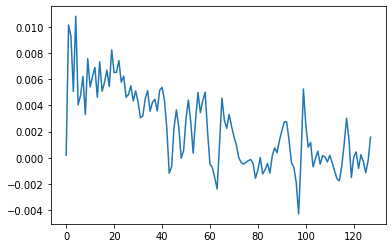

In [ ]:
df.iloc[0].plot();

In [ ]:
# Obtain these by inspecting the files
T = 128 #column
Ntrain = 7352 #range index->rows
Ntest = 2947
D = 9 #since there are 9 files
K = 6 #number of classes(1-6)

In [ ]:
def load_data():
  # Returns:
  # xtrain (Ntrain x T x D), ytrain (Ntrain)
  # xtest (Ntest x T x D), Ytest (Ntest)

  xtrain = np.zeros((Ntrain, T, D))
  xtest = np.zeros((Ntest, T, D))

  # train data
  ts_filenames = [
    'body_acc_x_train.txt',  'body_gyro_x_train.txt',  'total_acc_x_train.txt',
    'body_acc_y_train.txt',  'body_gyro_y_train.txt',  'total_acc_y_train.txt',
    'body_acc_z_train.txt',  'body_gyro_z_train.txt',  'total_acc_z_train.txt',
  ]

  ts_file_prefix = 'UCI HAR Dataset/train/' #find a path files are located

  for d, fn in enumerate(ts_filenames):
    df = pd.read_csv(
        f'{ts_file_prefix}Inertial Signals/{fn}', #load the file into the data frame.
        header = None,
        delim_whitespace=True
    )

    #Ntrain x T array
    x = df.to_numpy() #load the file into the data frame numpy_array
    xtrain[:, :, d] = x

  # train labels
  ytrain = pd.read_csv( #load in our labels
      f'{ts_file_prefix}y_train.txt', header=None).to_numpy()-1 #Since the labels start from one, we are going to subtract one so that they all start from zero.
  ytrain = ytrain.flatten()

  # test data
  ts_filenames = [
    'body_acc_x_test.txt',  'body_gyro_x_test.txt',  'total_acc_x_test.txt',
    'body_acc_y_test.txt',  'body_gyro_y_test.txt',  'total_acc_y_test.txt',
    'body_acc_z_test.txt',  'body_gyro_z_test.txt',  'total_acc_z_test.txt',
  ]

  ts_file_prefix = 'UCI HAR Dataset/test/'

  for d, fn in enumerate(ts_filenames):
    df = pd.read_csv(
        f'{ts_file_prefix}Inertial Signals/{fn}',
        header = None,
        delim_whitespace=True
    )

    #Ntrain x T array
    x = df.to_numpy()
    xtest[:, :, d] = x

  # train labels
  ytest = pd.read_csv(
      f'{ts_file_prefix}y_test.txt', header=None).to_numpy()-1
  ytest = ytest.flatten()

  return xtrain, ytrain, xtest, ytest

In [ ]:
xtrain, ytrain, xtest, ytest = load_data()

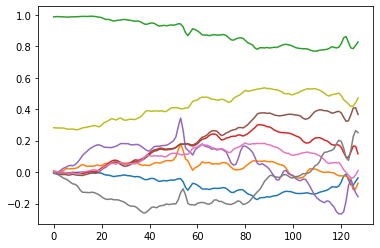

In [ ]:
# plot all D=9 time series of length T=128
plt.plot(xtrain[7000, :, :]);

This is a plot of all the details series at once, nothing special, but it gives you a sense of what the data looks like.


In [ ]:
# ANN
inputs = []
features = []
# features are just the output of each mini neural network that 
# will process different dimensions of the Time series.

# make a neural network for each of the D time series
for d in range(D):
  i = Input(shape=(T,)) #input
  x = Dense(32, activation='relu')(i) #hidden units
  x = Dense(16, activation='relu')(x) #hidden units
  inputs.append(i)
  features.append(x)

  # output of concatenate will be D * (size of individual ANN output)
  x = Concatenate()(features)
  x = Dense(K)(x)
  model = Model(inputs, x)

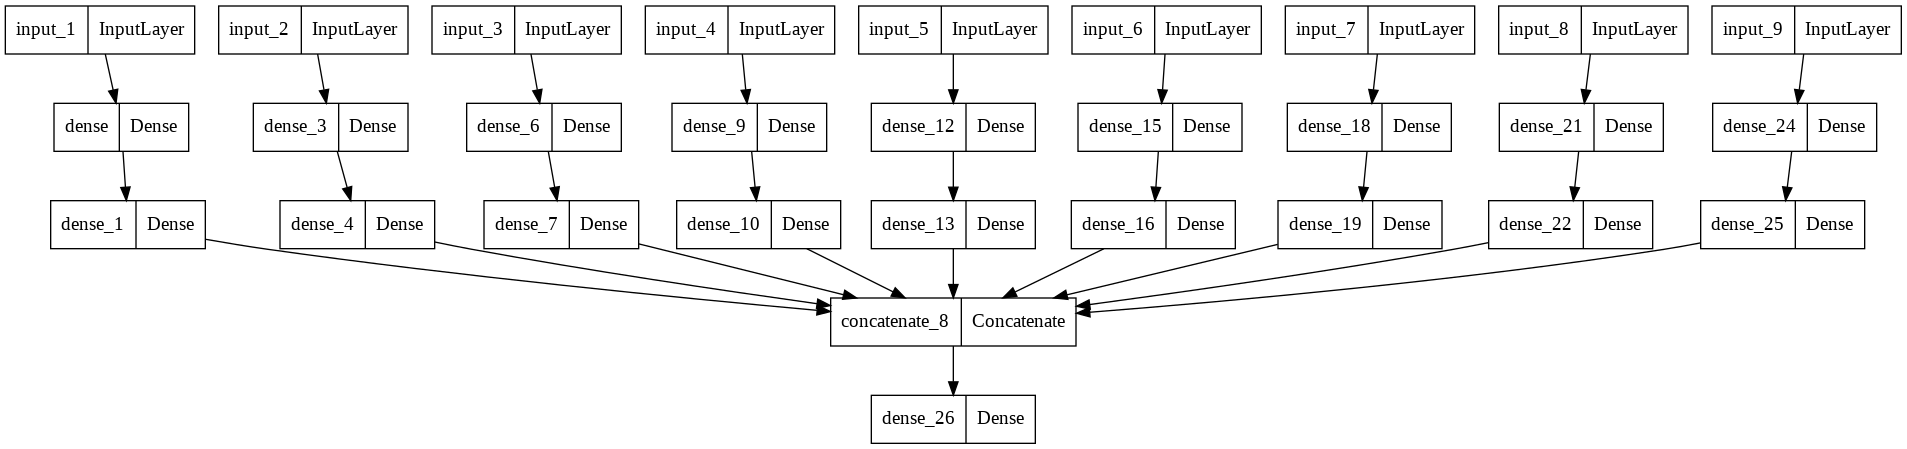

In [ ]:
# it's useful to create a picture of your model,
# the tensor flow plot model function can be used to do this.

tf.keras.utils.plot_model(model)

This will be used to save the best model according to some validation metric during the training process.

In [ ]:
check_point = ModelCheckpoint(
    'best_model.h5', monitor='val_accuracy', save_best_only=True
# first argumen = 'best_model.h5' -> file name to save the best model
# second argumen = monitor='val_accuracy' -> which metric to monitor.
# third argumen = save_best_only=True ->  save only the best mode
)

In [ ]:
model.compile(
    loss=SparseCategoricalCrossentropy(from_logits=True), #multiclass
    optimizer='adam',
    metrics=['accuracy']
)

In [ ]:
xtrain_split = []
xtest_split = []
for d in range(D):
  xtrain_split.append(xtrain[:, :, d])
  xtest_split.append(xtest[:, :, d])

In [ ]:
r = model.fit(
    xtrain_split,
    ytrain,
    epochs=15,
    callbacks=[check_point],
    validation_data=(xtest_split, ytest)
)

Epoch 1/15
230/230 [==============================] - 5s 12ms/step - loss: 0.6676 - accuracy: 0.7807 - val_loss: 0.4709 - val_accuracy: 0.8347
Epoch 2/15
230/230 [==============================] - 2s 10ms/step - loss: 0.2342 - accuracy: 0.9172 - val_loss: 0.3649 - val_accuracy: 0.8633
Epoch 3/15
230/230 [==============================] - 2s 10ms/step - loss: 0.1702 - accuracy: 0.9389 - val_loss: 0.3344 - val_accuracy: 0.8724
Epoch 4/15
230/230 [==============================] - 2s 10ms/step - loss: 0.1403 - accuracy: 0.9482 - val_loss: 0.3303 - val_accuracy: 0.8863
Epoch 5/15
230/230 [==============================] - 2s 7ms/step - loss: 0.1240 - accuracy: 0.9550 - val_loss: 0.2984 - val_accuracy: 0.8938
Epoch 6/15
230/230 [==============================] - 2s 9ms/step - loss: 0.1114 - accuracy: 0.9600 - val_loss: 0.3046 - val_accuracy: 0.8911
Epoch 7/15
230/230 [==============================] - 3s 13ms/step - loss: 0.1036 - accuracy: 0.9637 - val_loss: 0.2994 - val_accuracy: 0.9050
E

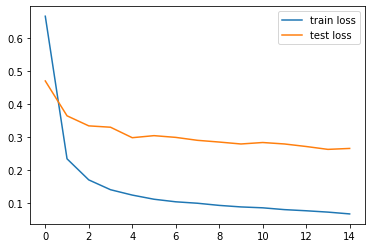

In [ ]:
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='test loss')
plt.legend();

Notice that the train loss is much better than the loss.

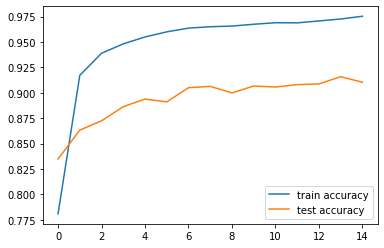

In [ ]:
plt.plot(r.history['accuracy'], label='train accuracy')
plt.plot(r.history['val_accuracy'], label='test accuracy')
plt.legend();

Train accuracy is much better than test accuracy

In [ ]:
# load best model
best_model = tf.keras.models.load_model('best_model.h5')

In [ ]:
# make predictions
ptest = best_model.predict(xtest_split)

In [ ]:
# evaluate
np.mean(np.argmax(ptest, axis=1) == ytest)

0.9158466236851035

## **Feature Based Model**

In [ ]:
from sklearn.preprocessing import StandardScaler

def load_features():
  # Returns:
  # x_train (Ntrain x D)
  # x_test (Ntest x D)

  # train data
  df = pd.read_csv(
      'UCI HAR Dataset/train/X_train.txt',
      header=None,
      delim_whitespace=True
  )

  feat_train = df.to_numpy()

  # test data
  df = pd.read_csv(
      'UCI HAR Dataset/test/X_test.txt',
      header=None,
      delim_whitespace=True
  )

  feat_test = df.to_numpy()

  scaler = StandardScaler()
  feat_train = scaler.fit_transform(feat_train)
  feat_test = scaler.transform(feat_test)

  return feat_train, feat_test

In [ ]:
feat_train, feat_test = load_features()

In [ ]:
D_feat = feat_train.shape[1]

In [ ]:
D_feat

561

In [ ]:
# Basic ANN
i = Input(shape=(D_feat, )) # D_feat as T for input
x = Dense(32, activation='relu')(i)
X = Dense(K)(x)
model = Model(i, x)

In [ ]:
model.compile(
    loss=SparseCategoricalCrossentropy(from_logits=True),
    optimizer='adam',
    metrics=['accuracy'],
)

In [ ]:
check_point2 = ModelCheckpoint(
    'best_model_basic.h5', monitor='val_accuracy', save_best_only=True
)

In [ ]:
r = model.fit(
    feat_train,
    ytrain,
    epochs=15,
    callbacks=[check_point2],
    validation_data=(feat_test, ytest)
)

Epoch 1/15
230/230 [==============================] - 1s 3ms/step - loss: 0.5684 - accuracy: 0.8074 - val_loss: 0.2806 - val_accuracy: 0.9101
Epoch 2/15
230/230 [==============================] - 1s 2ms/step - loss: 0.1767 - accuracy: 0.9455 - val_loss: 0.2078 - val_accuracy: 0.9270
Epoch 3/15
230/230 [==============================] - 1s 2ms/step - loss: 0.1252 - accuracy: 0.9631 - val_loss: 0.1760 - val_accuracy: 0.9399
Epoch 4/15
230/230 [==============================] - 1s 2ms/step - loss: 0.1005 - accuracy: 0.9708 - val_loss: 0.1856 - val_accuracy: 0.9287
Epoch 5/15
230/230 [==============================] - 1s 2ms/step - loss: 0.0868 - accuracy: 0.9724 - val_loss: 0.1584 - val_accuracy: 0.9423
Epoch 6/15
230/230 [==============================] - 0s 2ms/step - loss: 0.0753 - accuracy: 0.9752 - val_loss: 0.1566 - val_accuracy: 0.9420
Epoch 7/15
230/230 [==============================] - 1s 2ms/step - loss: 0.0683 - accuracy: 0.9793 - val_loss: 0.1726 - val_accuracy: 0.9325
Epoch 

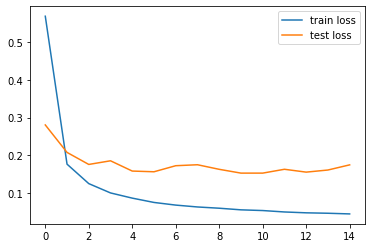

In [ ]:
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='test loss')
plt.legend();

Train loss much better than test loss

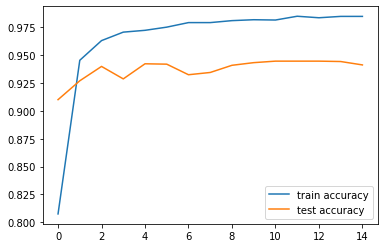

In [ ]:
plt.plot(r.history['accuracy'], label='train accuracy')
plt.plot(r.history['val_accuracy'], label='test accuracy')
plt.legend();

Train accuracy better than test accuracy

In [ ]:
# load best models
best_model = tf.keras.models.load_model('best_model_basic.h5')

In [ ]:
# make prediction
ptest = best_model.predict(feat_test)

In [ ]:
# evaluate
np.mean(np.argmax(ptest, axis=1) == ytest)

0.9446895147607737

You can see that our suspicions are correct, in fact, using the features led to a better performing model compared to using the TIME series.


## **W/ Machine Learning Model**

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

**Logistic Regression**

In [ ]:
lr = LogisticRegression(
    solver='liblinear' #lib linear for for some reason, the default optimizer didn't work that well
)
lr.fit(feat_train, ytrain)
print('Accuracy Logistic Regression (Train):', lr.score(feat_train, ytrain))

Accuracy Logistic Regression (Train): 0.9945593035908596


In [ ]:
print('Accuracy Logistic Regression (Test):', lr.score(feat_test, ytest))

Accuracy Logistic Regression (Test): 0.9613165931455717


**Support Vector Machine**

In [ ]:
svc = SVC()
svc.fit(feat_train, ytrain)
print('Accuracy Support Vector Classifier (Train):', svc.score(feat_train, ytrain))

Accuracy Support Vector Classifier (Train): 0.9866702937976061


In [ ]:
print('Accuracy Support Vector Classifier (Test):', svc.score(feat_test, ytest))

Accuracy Support Vector Classifier (Test): 0.9521547336274178


In [ ]:
svc.get_params()

{'C': 1.0,
 'break_ties': False,
 'cache_size': 200,
 'class_weight': None,
 'coef0': 0.0,
 'decision_function_shape': 'ovr',
 'degree': 3,
 'gamma': 'scale',
 'kernel': 'rbf',
 'max_iter': -1,
 'probability': False,
 'random_state': None,
 'shrinking': True,
 'tol': 0.001,
 'verbose': False}

**Support Vector Machine with Linear Kernel**

In [ ]:
svc_lin = SVC(kernel='linear')
svc_lin.fit(feat_train, ytrain)
print('Accuracy Support Vector Classifier (Kernel Linear)-(Train):', svc_lin.score(feat_train, ytrain))

Accuracy Support Vector Classifier (Kernel Linear)-(Train): 0.9968715995647442


In [ ]:
print('Accuracy Support Vector Classifier (Kernel Linear)-(Test):', svc_lin.score(feat_test, ytest))

Accuracy Support Vector Classifier (Kernel Linear)-(Test): 0.9609772650152698


**Random Forest Classifier**

In [ ]:
rf = RandomForestClassifier()
rf.fit(feat_train, ytrain)
print('Accuracy Random Forest (Train):', rf.score(feat_train, ytrain))

Accuracy Random Forest (Train): 1.0


In [ ]:
print('Accuracy Random Forest (Test):', rf.score(feat_test, ytest))

Accuracy Random Forest (Test): 0.9328130302002036


## **Combined Model**

In [ ]:
# Combined model
inputs = []
features = []

# make a neural network for each of the D time series
for d in range(D):
  i = Input(shape=(T,))
  x = Dense(32, activation='relu')(i)
  x = Dense(16, activation='relu')(x)
  inputs.append(i)
  features.append(x)

i2 = Input(shape=(D_feat,))
x2 = Dense(32, activation='relu')(i2)

# output of concatenate will be D * (size of individual ANN output)
x = Concatenate()(features + [x2])
x = Dense(K)(x)
model = Model(inputs + [i2], x)

In [ ]:
model.compile(
    loss=SparseCategoricalCrossentropy(from_logits=True),
    optimizer='adam',
    metrics=['accuracy'],
)

In [ ]:
check_point3 = ModelCheckpoint(
    'best_model_combined.h5', monitor='val_accuracy', save_best_only=True
)

In [ ]:
r = model.fit(
    xtrain_split + [feat_train],
    ytrain,
    epochs=15,
    callbacks=[check_point3],
    validation_data=(xtest_split + [feat_test], ytest)
)

Epoch 1/15
230/230 [==============================] - 3s 8ms/step - loss: 0.2642 - accuracy: 0.9113 - val_loss: 0.2148 - val_accuracy: 0.9226
Epoch 2/15
230/230 [==============================] - 1s 6ms/step - loss: 0.0867 - accuracy: 0.9702 - val_loss: 0.1839 - val_accuracy: 0.9338
Epoch 3/15
230/230 [==============================] - 1s 6ms/step - loss: 0.0648 - accuracy: 0.9763 - val_loss: 0.1658 - val_accuracy: 0.9447
Epoch 4/15
230/230 [==============================] - 1s 5ms/step - loss: 0.0530 - accuracy: 0.9797 - val_loss: 0.1792 - val_accuracy: 0.9440
Epoch 5/15
230/230 [==============================] - 1s 6ms/step - loss: 0.0463 - accuracy: 0.9831 - val_loss: 0.1511 - val_accuracy: 0.9518
Epoch 6/15
230/230 [==============================] - 1s 6ms/step - loss: 0.0376 - accuracy: 0.9874 - val_loss: 0.1658 - val_accuracy: 0.9488
Epoch 7/15
230/230 [==============================] - 1s 5ms/step - loss: 0.0362 - accuracy: 0.9878 - val_loss: 0.1807 - val_accuracy: 0.9477
Epoch 

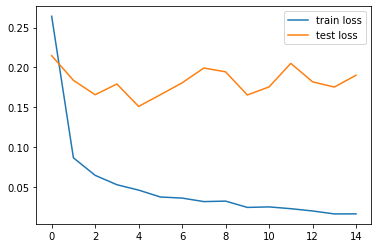

In [ ]:
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='test loss')
plt.legend();

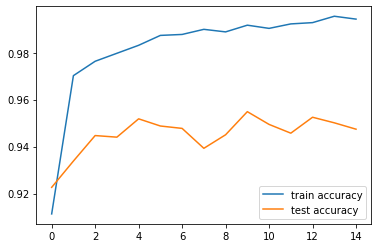

In [ ]:
plt.plot(r.history['accuracy'], label='train accuracy')
plt.plot(r.history['val_accuracy'], label='test accuracy')
plt.legend();

In [ ]:
best_model = tf.keras.models.load_model('best_model_combined.h5')

In [ ]:
ptest = best_model.predict(xtest_split + [feat_test])

In [ ]:
# evaluate
np.mean(np.argmax(ptest, axis=1) == ytest)

0.9548693586698337